## Notebook to convet the grid_data.mat file into a csv

### Plotting the grid_data.mat

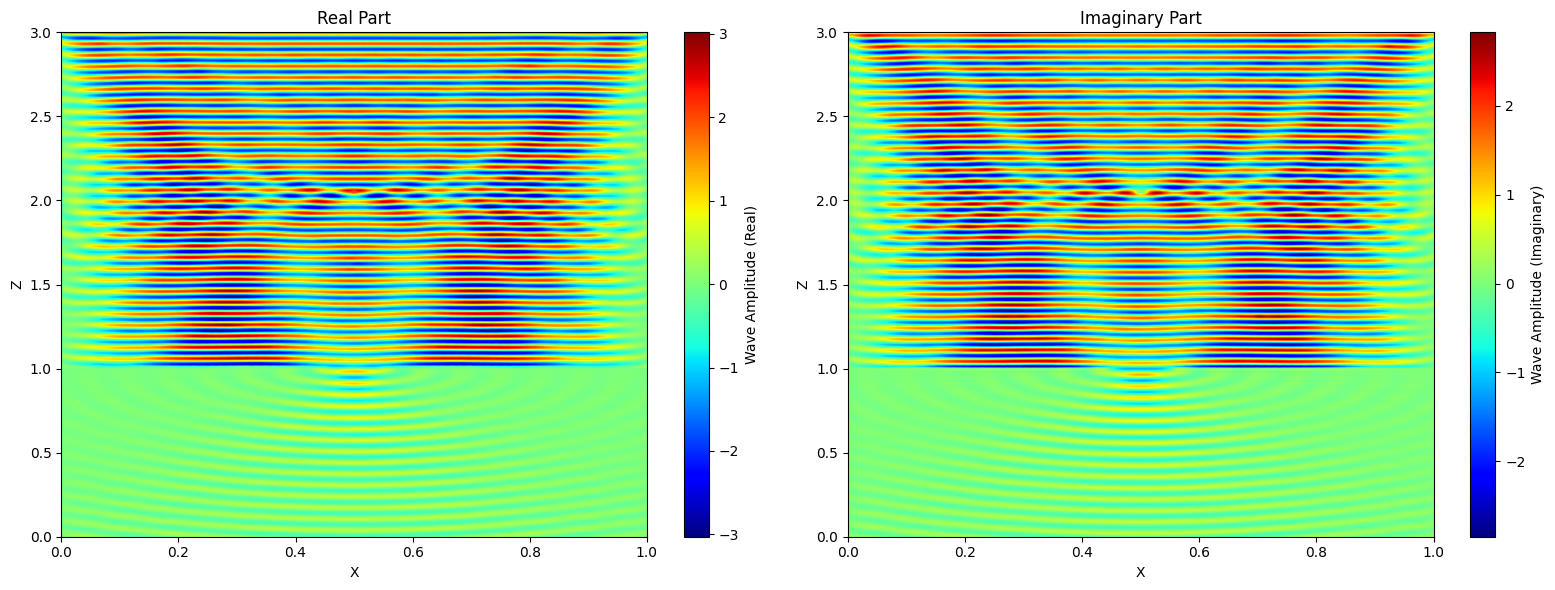

In [3]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load the .mat file with relative path
data = scipy.io.loadmat('./MATLAB FEM solver/grid_data.mat')  

# Extract x, y, z values
x_values = data['x_values'].flatten()  
z_values = data['z_values'].flatten() 
u_rvalues = data['u_rvalues'].flatten()  
u_ivalues = data['u_ivalues'].flatten()  

# Create a grid for heatmap
grid_size = 500  # Adjust for resolution
xi = np.linspace(min(x_values), max(x_values), grid_size)
zi = np.linspace(min(z_values), max(z_values), grid_size)
Xi, Zi = np.meshgrid(xi, zi)

# Interpolate scattered data to a grid for both real and imaginary parts
U_real = griddata((x_values, z_values), u_rvalues, (Xi, Zi), method='cubic')
U_imag = griddata((x_values, z_values), u_ivalues, (Xi, Zi), method='cubic')

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot real part
im1 = ax1.imshow(U_real, extent=(min(x_values), max(x_values), min(z_values), max(z_values)),
                 origin='lower', cmap='jet', aspect='auto')
ax1.set_xlabel('X')
ax1.set_ylabel('Z')
ax1.set_title('Real Part')
plt.colorbar(im1, ax=ax1, label="Wave Amplitude (Real)")

# Plot imaginary part
im2 = ax2.imshow(U_imag, extent=(min(x_values), max(x_values), min(z_values), max(z_values)),
                 origin='lower', cmap='jet', aspect='auto')
ax2.set_xlabel('X')
ax2.set_ylabel('Z')
ax2.set_title('Imaginary Part')
plt.colorbar(im2, ax=ax2, label="Wave Amplitude (Imaginary)")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


### Filtering the part we are intrested in
Here we are plotting the part after the slit. This is the part we are intersted in and will compare to the PINN. We will also flip the plot inside up so the slit will be at z=0. 

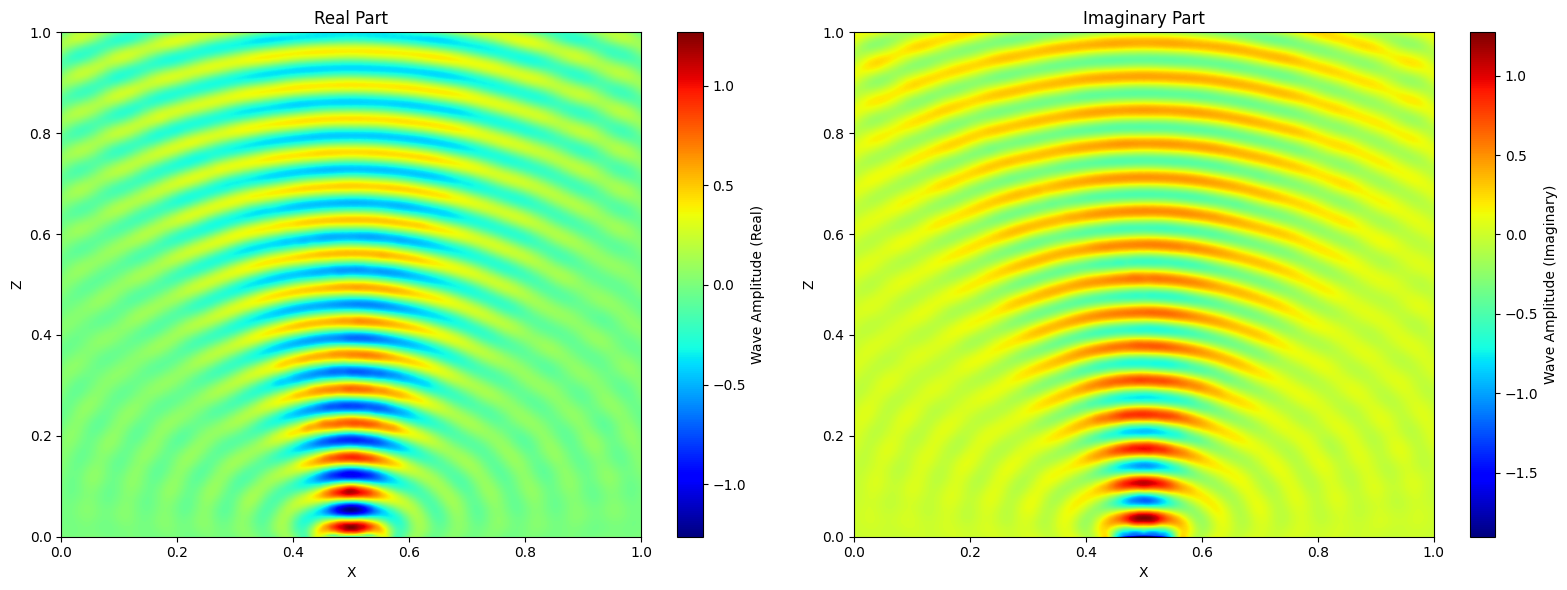

In [24]:
# Filter points where z <= 1
mask = z_values <= 1
x_filtered = x_values[mask]
z_filtered = z_values[mask]
u_rvalues_filtered = u_rvalues[mask]
u_ivalues_filtered = u_ivalues[mask]

# Invert z values
z_filtered = 1-z_filtered

# Create a grid for heatmap
grid_size = 500  # Adjust for resolution
xi = np.linspace(min(x_filtered), max(x_filtered), grid_size)
zi = np.linspace(min(z_filtered), max(z_filtered), grid_size)
Xi, Zi = np.meshgrid(xi, zi)

# Interpolate scattered data to a grid for both real and imaginary parts
U_real = griddata((x_filtered, z_filtered), u_rvalues_filtered, (Xi, Zi), method='cubic')
U_imag = griddata((x_filtered, z_filtered), u_ivalues_filtered, (Xi, Zi), method='cubic')

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot real part
im1 = ax1.imshow(U_real, extent=(min(x_filtered), max(x_filtered), min(z_filtered), max(z_filtered)),
                 origin='lower', cmap='jet', aspect='auto')
ax1.set_xlabel('X')
ax1.set_ylabel('Z')
ax1.set_title('Real Part')
plt.colorbar(im1, ax=ax1, label="Wave Amplitude (Real)")

# Plot imaginary part
im2 = ax2.imshow(U_imag, extent=(min(x_filtered), max(x_filtered), min(z_filtered), max(z_filtered)),
                 origin='lower', cmap='jet', aspect='auto')
ax2.set_xlabel('X')
ax2.set_ylabel('Z')
ax2.set_title('Imaginary Part')
plt.colorbar(im2, ax=ax2, label="Wave Amplitude (Imaginary)")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

## Save the data as csv file file for later comparison
We only use one set of values either the real or the imaginary for training due to the architecture. Save them into the baundary_coditions directory in the seq2seq or curriculum dirs.


In [25]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pandas as pd
import os

# Load and filter data first
# ...existing code...

# Create DataFrame with filtered data
filtered_data = pd.DataFrame({
    'x': x_filtered,
    'z': z_filtered,  # Note: using y_filtered since that's our z coordinate
    'u': u_ivalues_filtered,
})

# Define output path
output_path = './seq2seq/boundary_conditions/grid_data.csv'

# # Save to CSV with error handling
# try:
#     filtered_data.to_csv(output_path, index=False)
#     print(f"Data successfully saved to {os.path.abspath(output_path)}")
# except Exception as e:
#     print(f"Error saving file: {e}")


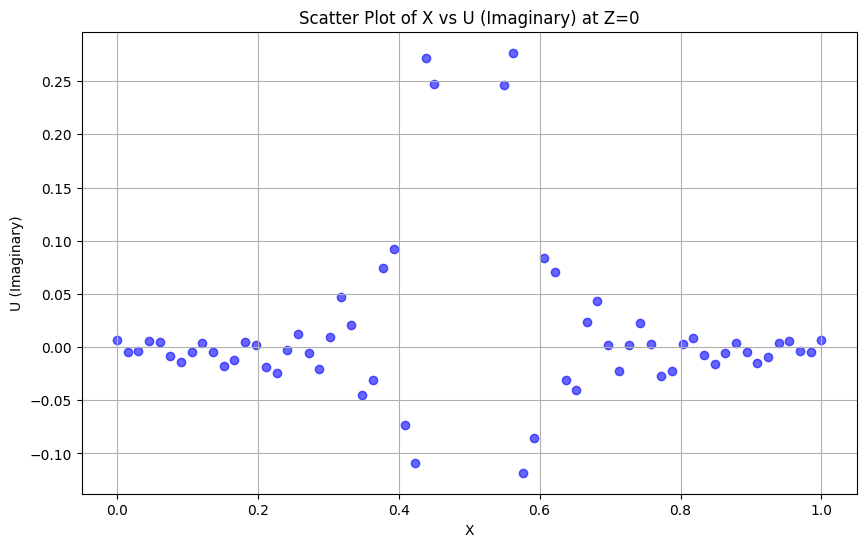

In [26]:
# Filter data where z=0
z_zero_mask = z_filtered == 0
x_at_z_zero = x_filtered[z_zero_mask]
u_at_z_zero = u_rvalues_filtered[z_zero_mask]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_at_z_zero, u_at_z_zero, color='b', alpha=0.6)
plt.xlabel('X')
plt.ylabel('U (Imaginary)')
plt.title('Scatter Plot of X vs U (Imaginary) at Z=0')
plt.grid(True)
plt.show()

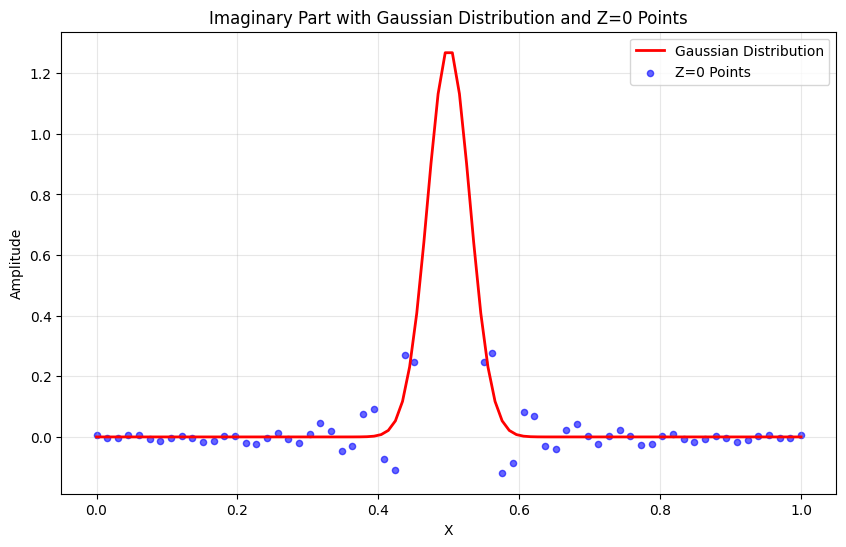

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mu = 0.5
sigma = 0.03
amplitude = 1
grid_size = 100

# Generate synthetic data for xi and z_filtered for testing
xi = np.linspace(0, 1, 50)  # Example range of x values

# Manually compute the Gaussian function
x_gaussian = np.linspace(min(xi), max(xi), grid_size)
y_gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_gaussian - mu) / sigma) ** 2)

# Normalize to match the scale of data
y_gaussian = y_gaussian / max(y_gaussian)  # Normalize to max 1

# Filter data where z=0
z_zero_mask = z_filtered == 0
x_at_z_zero = x_filtered[z_zero_mask]
u_at_z_zero = u_rvalues_filtered[z_zero_mask]

# Create combined plot
plt.figure(figsize=(10, 6))

# Add Gaussian distribution
plt.plot(x_gaussian, y_gaussian * max(u_rvalues_filtered), 
         color='r', linewidth=2, label='Gaussian Distribution')

# Add scatter plot
plt.scatter(x_at_z_zero, u_at_z_zero, 
            color='blue', alpha=0.6, s=20, label='Z=0 Points')

plt.xlabel('X')
plt.ylabel('Amplitude')
plt.title('Imaginary Part with Gaussian Distribution and Z=0 Points')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [33]:
# Create DataFrame with Gaussian data
gaussian_data = pd.DataFrame({
    'x': x_gaussian,
    'z': np.zeros_like(x_gaussian),  # Add column y full of zeros
    'u': y_gaussian,   
})

# Define output path for Gaussian data
# gaussian_output_path = './seq2seq/boundary_conditions/bc1.csv'

# Save to CSV with error handling
try:
    gaussian_data.to_csv(gaussian_output_path, index=False)
    print(f"Gaussian data successfully saved to {os.path.abspath(gaussian_output_path)}")
except Exception as e:
    print(f"Error saving Gaussian data file: {e}")

Error saving Gaussian data file: name 'gaussian_output_path' is not defined
